# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
temp = []
humidity = []
cloudPercent = []
windSpeed = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

573

In [4]:
weather_df = pd.DataFrame(cities).rename(columns={0: "City"})
weather_df.head()

,City
0,sola
1,pangnirtung
2,butaritari
3,mahebourg
4,atuona


In [5]:
params = {
    "appid": weather_api_key,
    "units": "imperial"
}
weatherUrl = "http://api.openweathermap.org/data/2.5/weather?"
for index,row in weather_df.iterrows():
    city = row["City"]
    params["q"] = city
    print(f"Processing Record {index} | {city}")
    loopResponse = requests.get(weatherUrl, params=params).json()
    
    try:
        weather_df.loc[index, "Latitude"] = loopResponse['coord']['lat']
        weather_df.loc[index, "Longitude"] = loopResponse['coord']['lon']
        weather_df.loc[index, "Temperature"] = loopResponse['main']['temp']
        weather_df.loc[index, "Humidity"] = loopResponse['main']['humidity']
        weather_df.loc[index, "Cloudiness"] = loopResponse['clouds']['all']
        weather_df.loc[index, "Wind Speed"] = loopResponse['wind']['speed']
        weather_df.loc[index, "Country"] = loopResponse['sys']['country']
        weather_df.loc[index, "Date"] = loopResponse['dt']
        
    except KeyError:
        print("Missing Field... Skipping")

Processing Record 0 | sola
Processing Record 1 | pangnirtung
Processing Record 2 | butaritari
Processing Record 3 | mahebourg
Processing Record 4 | atuona
Processing Record 5 | avarua
Processing Record 6 | hilo
Processing Record 7 | jucurutu
Processing Record 8 | saint-philippe
Processing Record 9 | karaul
Missing Field... Skipping
Processing Record 10 | tsagan aman
Processing Record 11 | sentyabrskiy
Missing Field... Skipping
Processing Record 12 | thompson
Processing Record 13 | leningradskiy
Processing Record 14 | tuatapere
Processing Record 15 | cape town
Processing Record 16 | mataura
Processing Record 17 | punta arenas
Processing Record 18 | norman wells
Processing Record 19 | hobart
Processing Record 20 | carnarvon
Processing Record 21 | merauke
Processing Record 22 | ocos
Processing Record 23 | chokurdakh
Processing Record 24 | barrow
Processing Record 25 | victoria
Processing Record 26 | lima
Processing Record 27 | luena
Processing Record 28 | salalah
Processing Record 29 | fu

Processing Record 232 | paamiut
Processing Record 233 | thinadhoo
Processing Record 234 | yatou
Processing Record 235 | iquique
Processing Record 236 | yilan
Processing Record 237 | onega
Processing Record 238 | kourou
Processing Record 239 | bukachacha
Processing Record 240 | rungata
Missing Field... Skipping
Processing Record 241 | arraial do cabo
Processing Record 242 | east london
Processing Record 243 | kuhdasht
Processing Record 244 | kikwit
Processing Record 245 | yumen
Processing Record 246 | hasaki
Processing Record 247 | iqaluit
Processing Record 248 | alaca
Processing Record 249 | tautira
Processing Record 250 | talcahuano
Processing Record 251 | kushiro
Processing Record 252 | husavik
Processing Record 253 | southbury
Processing Record 254 | amnat charoen
Processing Record 255 | kangaatsiaq
Processing Record 256 | karamay
Missing Field... Skipping
Processing Record 257 | kavaratti
Processing Record 258 | zhelyabovka
Processing Record 259 | sikasso
Processing Record 260 | ol

Processing Record 467 | palana
Processing Record 468 | tabulbah
Missing Field... Skipping
Processing Record 469 | lorengau
Processing Record 470 | augusto correa
Processing Record 471 | mahanje
Processing Record 472 | granja
Processing Record 473 | sobolevo
Processing Record 474 | muisne
Processing Record 475 | matameye
Missing Field... Skipping
Processing Record 476 | geresk
Missing Field... Skipping
Processing Record 477 | copiapo
Processing Record 478 | mujiayingzi
Processing Record 479 | marihatag
Processing Record 480 | khuzdar
Processing Record 481 | polovinnoye
Processing Record 482 | inongo
Processing Record 483 | general salgado
Processing Record 484 | esik
Processing Record 485 | bull savanna
Processing Record 486 | araouane
Processing Record 487 | kem
Processing Record 488 | porto-vecchio
Processing Record 489 | vokhtoga
Processing Record 490 | vanimo
Processing Record 491 | lagoa
Processing Record 492 | riyadh
Processing Record 493 | konya
Processing Record 494 | boke
Proce

In [6]:
weather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,sola,-13.88,167.55,81.50,80.0,60.0,19.60,VU,1.604180e+09
1,pangnirtung,66.15,-65.71,13.03,79.0,100.0,5.17,CA,1.604180e+09
2,butaritari,3.07,172.79,81.39,75.0,100.0,15.57,KI,1.604180e+09
3,mahebourg,-20.41,57.70,66.20,82.0,75.0,8.05,MU,1.604180e+09
4,atuona,-9.80,-139.03,78.53,75.0,12.0,17.18,PF,1.604180e+09
...,...,...,...,...,...,...,...,...,...
568,smolenka,52.14,113.50,21.20,73.0,40.0,6.71,RU,1.604180e+09
569,eureka,40.80,-124.16,58.89,87.0,20.0,4.70,US,1.604180e+09
570,luderitz,-26.65,15.16,65.53,44.0,21.0,21.39,NA,1.604180e+09
571,deogarh,21.53,84.73,70.41,76.0,2.0,3.15,IN,1.604180e+09


In [7]:
clean_city_data_df = weather_df.loc[weather_df["Humidity"] <= 100,:]
clean_city_data_df = clean_city_data_df.dropna(how='any')
clean_city_data_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,sola,-13.88,167.55,81.50,80.0,60.0,19.60,VU,1.604180e+09
1,pangnirtung,66.15,-65.71,13.03,79.0,100.0,5.17,CA,1.604180e+09
2,butaritari,3.07,172.79,81.39,75.0,100.0,15.57,KI,1.604180e+09
3,mahebourg,-20.41,57.70,66.20,82.0,75.0,8.05,MU,1.604180e+09
4,atuona,-9.80,-139.03,78.53,75.0,12.0,17.18,PF,1.604180e+09
...,...,...,...,...,...,...,...,...,...
568,smolenka,52.14,113.50,21.20,73.0,40.0,6.71,RU,1.604180e+09
569,eureka,40.80,-124.16,58.89,87.0,20.0,4.70,US,1.604180e+09
570,luderitz,-26.65,15.16,65.53,44.0,21.0,21.39,NA,1.604180e+09
571,deogarh,21.53,84.73,70.41,76.0,2.0,3.15,IN,1.604180e+09


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

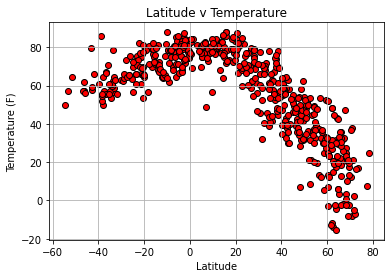

In [10]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

plt.savefig("../output_data/Fig1.png")

## Latitude vs. Humidity Plot

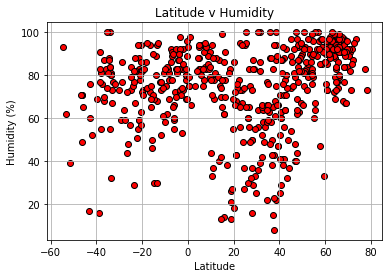

In [11]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

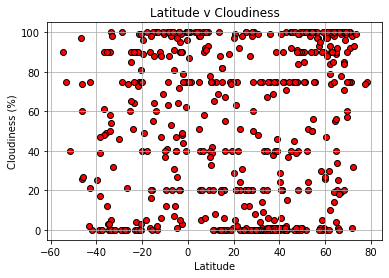

In [12]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

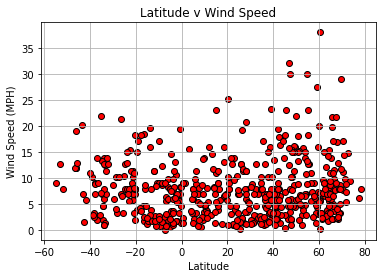

In [13]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

plt.savefig("../output_data/Fig4.png")

## Linear Regression

In [14]:
NHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] >= 0,:]
SHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7547482024177664


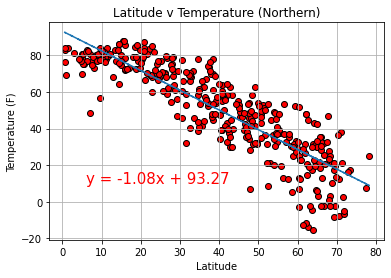

In [15]:
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Temperature (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"], NHcity_data_df["Temperature"])
reg_eq = slope * NHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46869331788665347


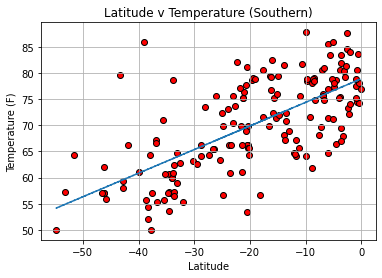

In [16]:
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Temperature (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"], SHcity_data_df["Temperature"])
reg_eq = slope * SHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09798226563359146


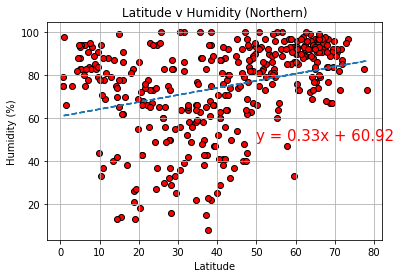

In [17]:
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Humidity (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"], NHcity_data_df["Humidity"])
reg_eq = slope * NHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig7.png")

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05705956273479099


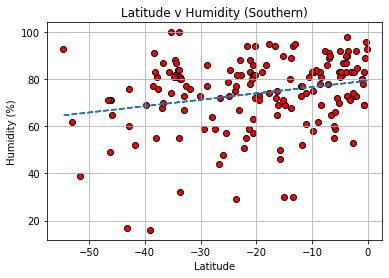

In [18]:
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Humidity (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"], SHcity_data_df["Humidity"])
reg_eq = slope * SHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(-50,11),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0516834031851256


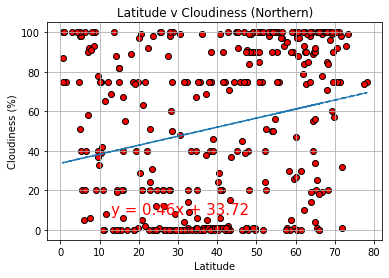

In [19]:
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Cloudiness (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"], NHcity_data_df["Cloudiness"])
reg_eq = slope * NHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(13,8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07003118478093337


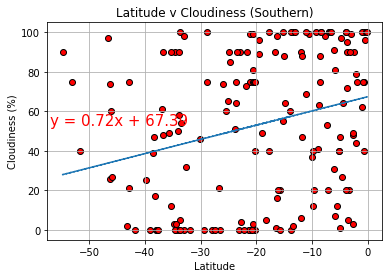

In [20]:
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Cloudiness (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"], SHcity_data_df["Cloudiness"])
reg_eq = slope * SHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(-57,53),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.024229091632654323


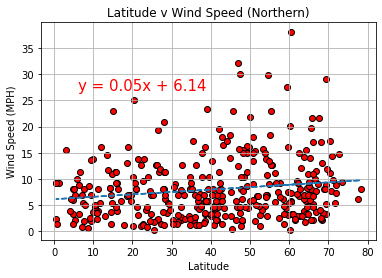

In [21]:
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Wind Speed (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"], NHcity_data_df["Wind Speed"])
reg_eq = slope * NHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(6,27),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0595847333588529


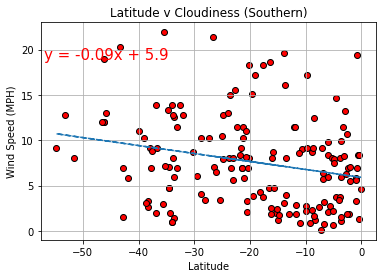

In [22]:
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Cloudiness (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"], SHcity_data_df["Wind Speed"])
reg_eq = SHcity_data_df["Latitude"]*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(-57,19),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig12.png")

In [23]:
clean_city_data_df.to_csv("../output_data/cities.csv",
                  encoding="utf-8", index=False, header=True)